## Forest Fires in Brazil
### Number of forest fires reported in Brazil by State

#### Context
Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series can help to take action to prevent them.
Brazil has the largest rainforest on the planet that is the Amazon rainforest.

#### Content
This dataset report of the number of forest fires in Brazil divided by states. The series comprises the period of approximately 10 years (1998 to 2017). The data were obtained from the official website of the Brazilian government.

http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

#### Acknowledgements
We thank the brazilian system of forest information

#### Inspiration
With this data, it is possible to assess the evolution of fires over the years as well as the regions where they were concentrated.
The legal Amazon comprises the states of Acre, Amapá, Pará, Amazonas, Rondonia, Roraima, and part of Mato Grosso, Tocantins, and Maranhão.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

### Load the dataset

In [2]:
FiresInBrazil = pd.read_csv('Datasets_Not_Cleaned/ForestFiresInBrazil/ForestFiresInBrazil.csv')
FiresInBrazil.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### Checking for Missing Values
Finding how many missing values are in each of these `object` type columns.

In [3]:
(FiresInBrazil.astype(np.object) == '?').any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [4]:
FiresInBrazil.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [5]:
for col in FiresInBrazil.columns:
    if FiresInBrazil[col].dtype == object:
        count = 0
        count = [count + 1 for x in FiresInBrazil[col] if x == '?']
        print(col + ' ' + str(sum(count)))

state 0
month 0
date 0


There are no missing value in 'object' type columns, so we can continue to next step.

### Remove '0' reported rows

There are many reports of zero fires in the document, which will affect the calculation of our other data. So here I delete all reports of zero fires.

In [6]:
indexNames = FiresInBrazil[FiresInBrazil['number'] == 0].index
 
FiresInBrazil.drop(indexNames , inplace=True)

In [7]:
FiresInBrazil.head(20)

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
18,2016,Acre,Janeiro,12.0,2016-01-01
24,2002,Acre,Fevereiro,1.0,2002-01-01
26,2004,Acre,Fevereiro,3.0,2004-01-01
29,2007,Acre,Fevereiro,5.0,2007-01-01
31,2009,Acre,Fevereiro,2.0,2009-01-01


### Change months naming to English

The original document is from the local government, so the language used is also the local language. Here I translate the text of each month back to English.

In [8]:
FiresInBrazil.month = FiresInBrazil.month.replace('Janeiro', 'January')
FiresInBrazil.month = FiresInBrazil.month.replace('Fevereiro', 'February')
FiresInBrazil.month = FiresInBrazil.month.replace('Março', 'March')
FiresInBrazil.month = FiresInBrazil.month.replace('Abril', 'April')
FiresInBrazil.month = FiresInBrazil.month.replace('Maio', 'May')
FiresInBrazil.month = FiresInBrazil.month.replace('Junho', 'June')
FiresInBrazil.month = FiresInBrazil.month.replace('Julho', 'July')
FiresInBrazil.month = FiresInBrazil.month.replace('Agosto', 'August')
FiresInBrazil.month = FiresInBrazil.month.replace('Setembro', 'September')
FiresInBrazil.month = FiresInBrazil.month.replace('Outubro', 'October')
FiresInBrazil.month = FiresInBrazil.month.replace('Novembro', 'November')
FiresInBrazil.month = FiresInBrazil.month.replace('Dezembro', 'December')
FiresInBrazil.month.value_counts()

October      534
September    529
November     520
August       516
December     482
July         479
February     476
January      474
June         467
March        465
April        459
May          436
Name: month, dtype: int64

## Aggregating categorical variables

Here I make that each months categorical into Spring, Summer, Fall and Winter.

In [9]:
FiresInBrazil['month'].value_counts()

October      534
September    529
November     520
August       516
December     482
July         479
February     476
January      474
June         467
March        465
April        459
May          436
Name: month, dtype: int64

In [10]:
months_categories = {'January':'spring', 'February':'spring', 'March' : 'spring', 
                    'April' : 'summer', 'May':'summer', 'June':'summer',
                    'July':'fall', 'August':'fall', 'September' : 'fall',
                    'October': 'winter', 'November': 'winter', 'December': 'winter'}

FiresInBrazil['month'] = [months_categories[x] for x in FiresInBrazil['month']]
FiresInBrazil['month'].value_counts()

winter    1536
fall      1524
spring    1415
summer    1362
Name: month, dtype: int64

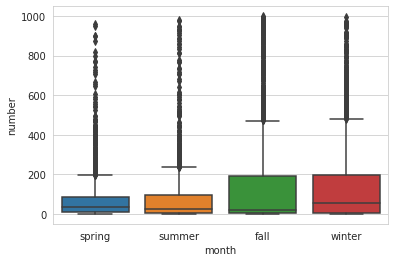

In [11]:
def plot_box(FiresInBrazil, col, col_y = 'number'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=FiresInBrazil)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(FiresInBrazil, 'month')  

We see that the fires have a higher trend that start on fall and winter

## Transforming Numeric Variables:

To improve performance of machine learning models transformations of the values are often applied. Typically, transformations are used to make the relationships between variables more linear. In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations.

In this case, you will transform the label, the price of the car. Execute the code in the cell below to display and examine a histogram of the label.

def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
hist_plot(FiresInBrazil['number'], 'number')

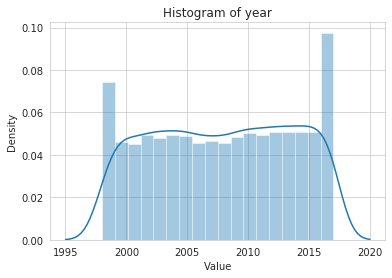

In [12]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
hist_plot(FiresInBrazil['year'], 'year')

The distribution of Fires is evenly scattered in each years. Given the skew and the fact that there are no values less than or equal to zero, there is change of numbers of fires each years.

Next, we will be making scatterplots of our variables.

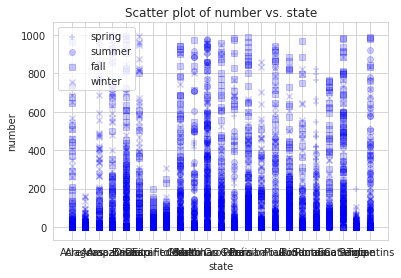

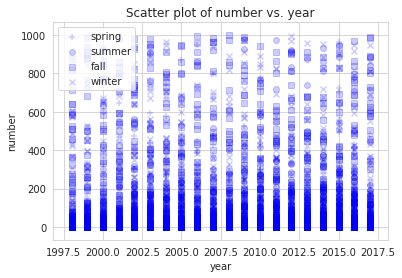

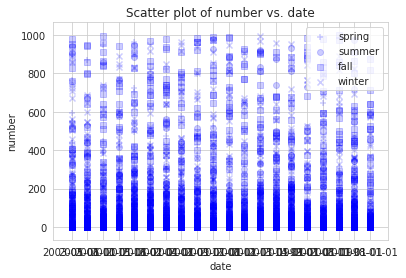

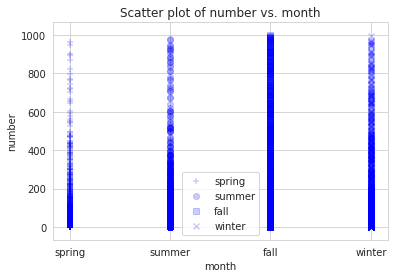

In [13]:
def plot_scatter_shape(FiresInBrazil, cols, shape_col = 'month', col_y = 'number', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = FiresInBrazil[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = FiresInBrazil[FiresInBrazil[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['state', 'year', 'date', 'month']
plot_scatter_shape(FiresInBrazil, num_cols)    